# SOAP Descriptor Example using DScribe
This notebook sets up and calculates the partial power spectrum vector $p(r)$ using the SOAP descriptor from `dscribe` for a methanol molecule (CH₃OH).

In [43]:
#%pip install ase==3.22.1
#%pip install numpy==1.24.4
#%pip install dscribe==2.5.0

In [ ]:
from dscribe.descriptors import SOAP
from ase.build import molecule
import matplotlib.pyplot as plt
import numpy as np
# Define the elements present in the system
species = ["H", "C", "O"]

# SOAP descriptor settings
r_cut = 6.0  # Cutoff for local region (in Å)
n_max = 4    # Number of radial basis functions
l_max = 2    # Maximum degree of spherical harmonics

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)

In [45]:
# Build a methanol (CH3OH) molecule
atoms = molecule("CH3OH")

In [46]:
#Show all module 
from ase.collections import g2
from ase.build.molecule import extra

print(g2.names)
print(extra.keys())

['PH3', 'P2', 'CH3CHO', 'H2COH', 'CS', 'OCHCHO', 'C3H9C', 'CH3COF', 'CH3CH2OCH3', 'HCOOH', 'HCCl3', 'HOCl', 'H2', 'SH2', 'C2H2', 'C4H4NH', 'CH3SCH3', 'SiH2_s3B1d', 'CH3SH', 'CH3CO', 'CO', 'ClF3', 'SiH4', 'C2H6CHOH', 'CH2NHCH2', 'isobutene', 'HCO', 'bicyclobutane', 'LiF', 'Si', 'C2H6', 'CN', 'ClNO', 'S', 'SiF4', 'H3CNH2', 'methylenecyclopropane', 'CH3CH2OH', 'F', 'NaCl', 'CH3Cl', 'CH3SiH3', 'AlF3', 'C2H3', 'ClF', 'PF3', 'PH2', 'CH3CN', 'cyclobutene', 'CH3ONO', 'SiH3', 'C3H6_D3h', 'CO2', 'NO', 'trans-butane', 'H2CCHCl', 'LiH', 'NH2', 'CH', 'CH2OCH2', 'C6H6', 'CH3CONH2', 'cyclobutane', 'H2CCHCN', 'butadiene', 'C', 'H2CO', 'CH3COOH', 'HCF3', 'CH3S', 'CS2', 'SiH2_s1A1d', 'C4H4S', 'N2H4', 'OH', 'CH3OCH3', 'C5H5N', 'H2O', 'HCl', 'CH2_s1A1d', 'CH3CH2SH', 'CH3NO2', 'Cl', 'Be', 'BCl3', 'C4H4O', 'Al', 'CH3O', 'CH3OH', 'C3H7Cl', 'isobutane', 'Na', 'CCl4', 'CH3CH2O', 'H2CCHF', 'C3H7', 'CH3', 'O3', 'P', 'C2H4', 'NCCN', 'S2', 'AlCl3', 'SiCl4', 'SiO', 'C3H4_D2d', 'H', 'COF2', '2-butyne', 'C2H5', 'BF3'

In [47]:
# Create SOAP output for the system, focusing on atom index 0
soap_atoms = soap.create(atoms, centers=[0])

# Print information about the atom
print(atoms[0])

Atom('C', [np.float64(-0.047131), np.float64(0.664389), np.float64(0.0)], index=0)


In [48]:
# Output the partial power spectrum vector p(r) for atom 0
for soap in soap_atoms[0]:
    print(f"{round(soap,1)}", end="  ")
print("")

# Print the type and shape of the SOAP descriptor
print(type(soap_atoms))
print(soap_atoms.shape)

0.0  0.8  2.5  3.0  13.8  44.7  54.4  145.3  176.9  215.4  0.0  -0.0  -0.0  0.0  0.2  0.5  -0.2  1.3  0.1  1.9  0.0  -0.0  0.0  0.0  0.0  0.0  -0.1  0.2  0.4  2.5  0.0  0.6  1.0  0.8  0.6  11.0  18.6  14.6  1.9  35.7  60.4  47.6  2.4  43.5  73.5  57.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.6  0.8  0.1  2.2  10.2  13.5  0.5  7.1  33.0  44.0  0.6  8.6  40.2  53.6  0.0  0.0  0.0  0.0  -0.0  -0.1  -0.9  -1.3  -0.0  -0.3  -2.0  -3.0  0.0  0.1  0.7  1.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.1  -0.1  -0.0  -0.0  -0.2  -0.4  0.0  0.0  0.4  0.7  0.0  0.5  0.8  0.6  8.8  14.8  11.7  25.1  19.8  15.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.4  0.6  0.1  1.7  8.1  10.8  0.2  2.9  13.7  18.3  0.2  2.3  10.8  14.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

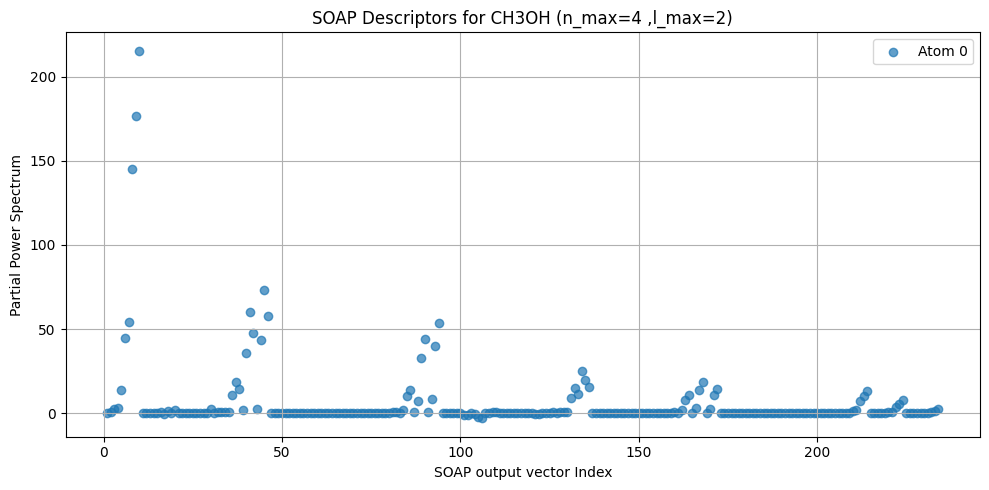

In [49]:
#PLOT
colors = plt.get_cmap('tab10')
plt.figure(figsize=(10, 5))
for i, vec in enumerate(soap_atoms):
    x = list(range(1, len(vec) + 1))  # x: feature indices (1, 2, 3, ...)
    plt.scatter(x, vec, label=f'Atom {i}', color=colors(i % 10), alpha=0.7)

plt.title("SOAP Descriptors for CH3OH (n_max={0} ,l_max={1})".format(n_max,l_max))
plt.xlabel("SOAP output vector Index")
plt.ylabel("Partial Power Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

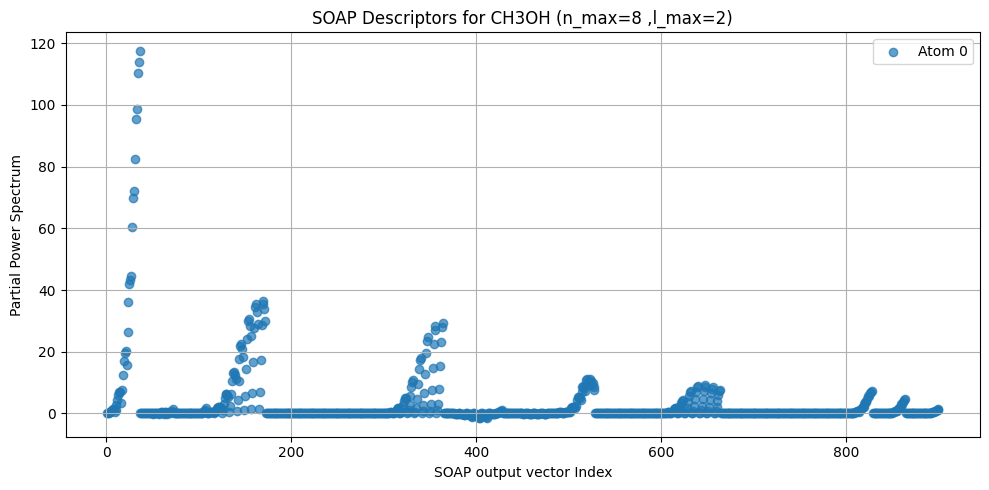

In [50]:
# SOAP descriptor settings
r_cut = 6.0  # Cutoff for local region (in Å)
n_max = 8    # Number of radial basis functions
l_max = 2    # Maximum degree of spherical harmonics

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)
atoms = molecule("CH3OH")

# Create SOAP output for the system, focusing on atom index 0
soap_atoms = soap.create(atoms, centers=[0])
#PLOT
colors = plt.get_cmap('tab10')
plt.figure(figsize=(10, 5))
for i, vec in enumerate(soap_atoms):
    x = list(range(1, len(vec) + 1))  # x: feature indices (1, 2, 3, ...)
    plt.scatter(x, vec, label=f'Atom {i}', color=colors(i % 10), alpha=0.7)

plt.title("SOAP Descriptors for CH3OH (n_max={0} ,l_max={1})".format(n_max,l_max))
plt.xlabel("SOAP output vector Index")
plt.ylabel("Partial Power Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

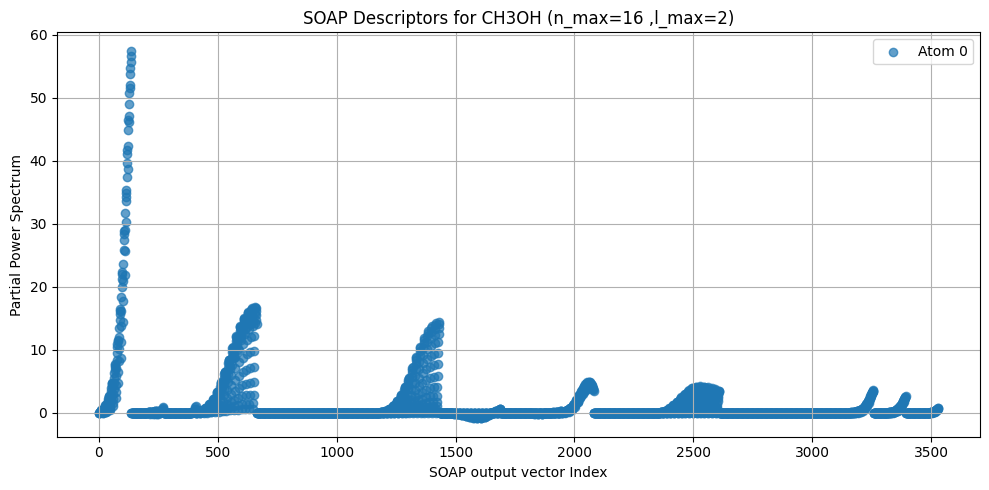

In [51]:
# SOAP descriptor settings
r_cut = 6.0  # Cutoff for local region (in Å)
n_max = 16    # Number of radial basis functions
l_max = 2    # Maximum degree of spherical harmonics

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)
atoms = molecule("CH3OH")

# Create SOAP output for the system, focusing on atom index 0
soap_atoms = soap.create(atoms, centers=[0])
#PLOT
colors = plt.get_cmap('tab10')
plt.figure(figsize=(10, 5))
for i, vec in enumerate(soap_atoms):
    x = list(range(1, len(vec) + 1))  # x: feature indices (1, 2, 3, ...)
    plt.scatter(x, vec, label=f'Atom {i}', color=colors(i % 10), alpha=0.7)

plt.title("SOAP Descriptors for CH3OH (n_max={0} ,l_max={1})".format(n_max,l_max))
plt.xlabel("SOAP output vector Index")
plt.ylabel("Partial Power Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

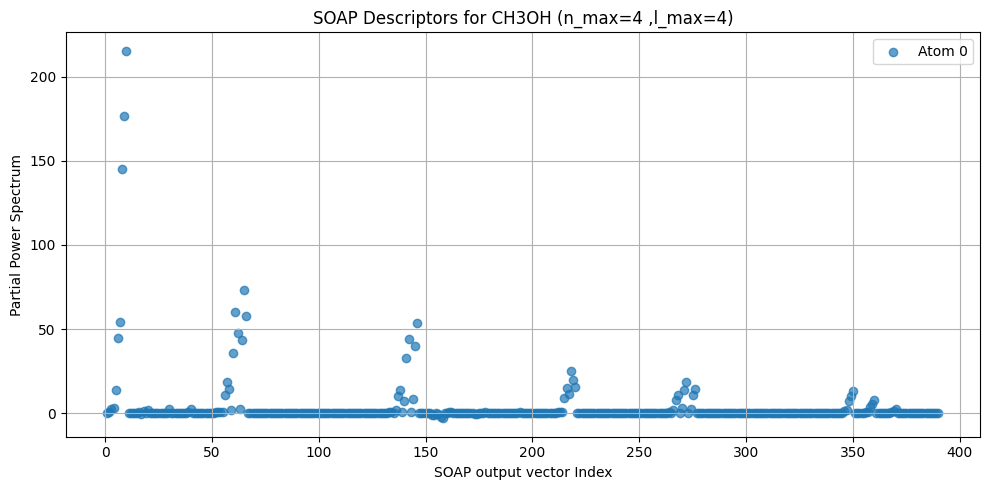

In [52]:
# SOAP descriptor settings
r_cut = 6.0  # Cutoff for local region (in Å)
n_max = 4    # Number of radial basis functions
l_max = 4    # Maximum degree of spherical harmonics

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)
atoms = molecule("CH3OH")

# Create SOAP output for the system, focusing on atom index 0
soap_atoms = soap.create(atoms, centers=[0])
#PLOT
colors = plt.get_cmap('tab10')
plt.figure(figsize=(10, 5))
for i, vec in enumerate(soap_atoms):
    x = list(range(1, len(vec) + 1))  # x: feature indices (1, 2, 3, ...)
    plt.scatter(x, vec, label=f'Atom {i}', color=colors(i % 10), alpha=0.7)

plt.title("SOAP Descriptors for CH3OH (n_max={0} ,l_max={1})".format(n_max,l_max))
plt.xlabel("SOAP output vector Index")
plt.ylabel("Partial Power Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

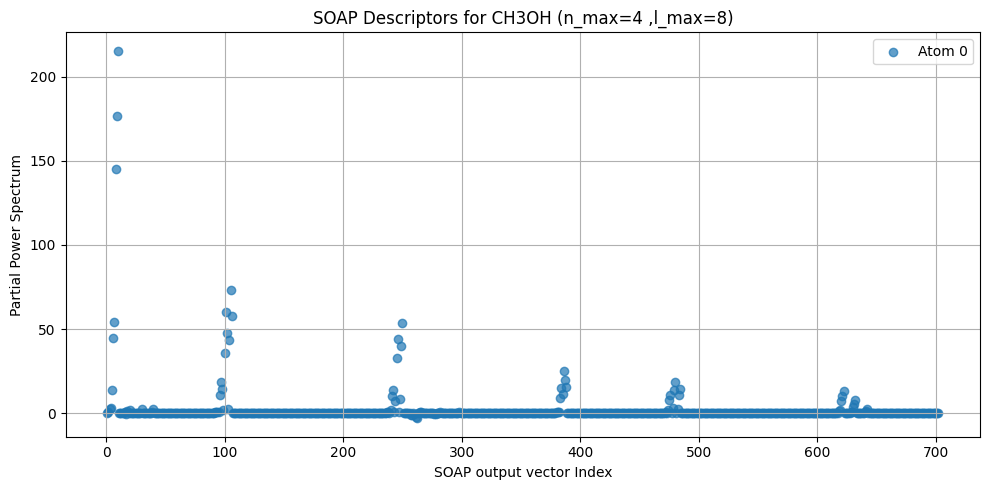

In [53]:
# SOAP descriptor settings
r_cut = 6.0  # Cutoff for local region (in Å)
n_max = 4    # Number of radial basis functions
l_max = 8    # Maximum degree of spherical harmonics

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)
atoms = molecule("CH3OH")

# Create SOAP output for the system, focusing on atom index 0
soap_atoms = soap.create(atoms, centers=[0])
#PLOT
colors = plt.get_cmap('tab10')
plt.figure(figsize=(10, 5))
for i, vec in enumerate(soap_atoms):
    x = list(range(1, len(vec) + 1))  # x: feature indices (1, 2, 3, ...)
    plt.scatter(x, vec, label=f'Atom {i}', color=colors(i % 10), alpha=0.7)

plt.title("SOAP Descriptors for CH3OH (n_max={0} ,l_max={1})".format(n_max,l_max))
plt.xlabel("SOAP output vector Index")
plt.ylabel("Partial Power Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

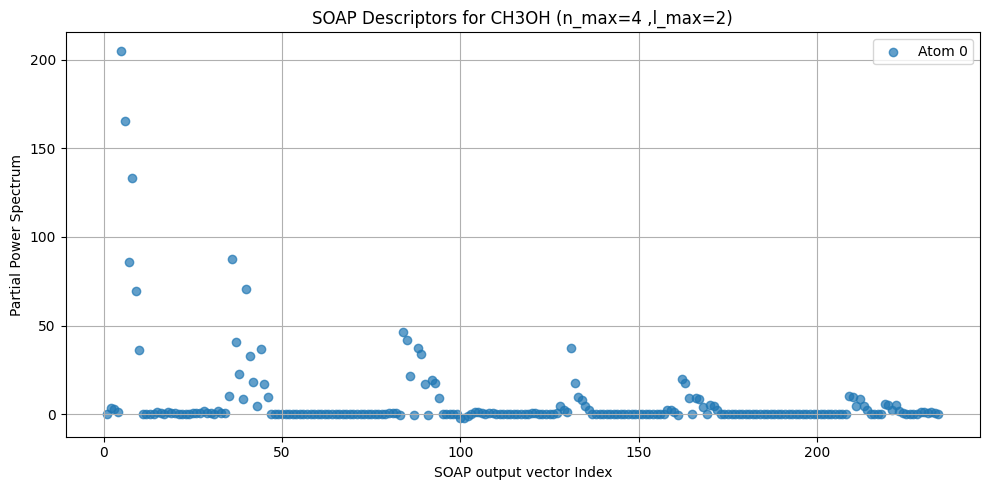

In [54]:
# SOAP descriptor settings
r_cut = 12.0  # Cutoff for local region (in Å)
n_max = 4    # Number of radial basis functions
l_max = 2    # Maximum degree of spherical harmonics

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)
atoms = molecule("CH3OH")

# Create SOAP output for the system, focusing on atom index 0
soap_atoms = soap.create(atoms, centers=[0])
#PLOT
colors = plt.get_cmap('tab10')
plt.figure(figsize=(10, 5))
for i, vec in enumerate(soap_atoms):
    x = list(range(1, len(vec) + 1))  # x: feature indices (1, 2, 3, ...)
    plt.scatter(x, vec, label=f'Atom {i}', color=colors(i % 10), alpha=0.7)

plt.title("SOAP Descriptors for CH3OH (n_max={0} ,l_max={1})".format(n_max,l_max))
plt.xlabel("SOAP output vector Index")
plt.ylabel("Partial Power Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

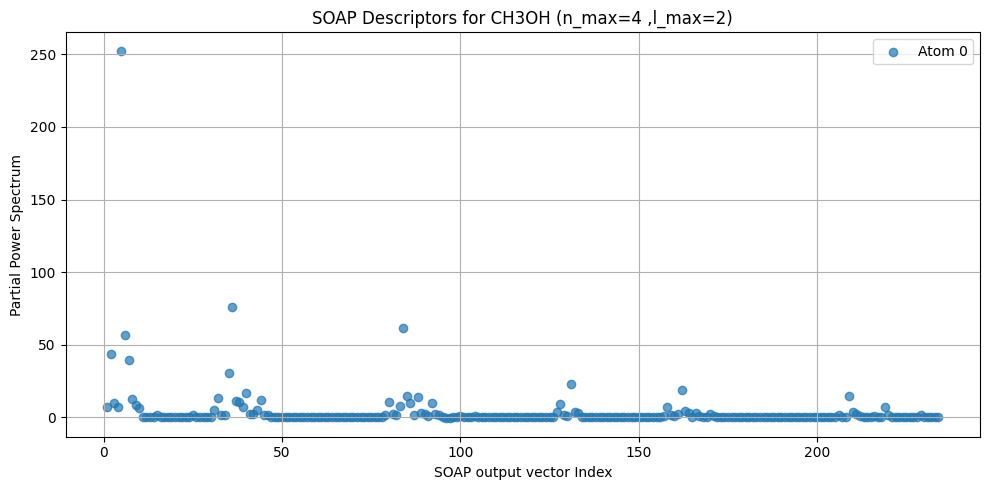

In [55]:
# SOAP descriptor settings
r_cut = 24.0  # Cutoff for local region (in Å)
n_max = 4    # Number of radial basis functions
l_max = 2    # Maximum degree of spherical harmonics

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)
atoms = molecule("CH3OH")

# Create SOAP output for the system, focusing on atom index 0
soap_atoms = soap.create(atoms, centers=[0])
#PLOT
colors = plt.get_cmap('tab10')
plt.figure(figsize=(10, 5))
for i, vec in enumerate(soap_atoms):
    x = list(range(1, len(vec) + 1))  # x: feature indices (1, 2, 3, ...)
    plt.scatter(x, vec, label=f'Atom {i}', color=colors(i % 10), alpha=0.7)

plt.title("SOAP Descriptors for CH3OH (n_max={0} ,l_max={1})".format(n_max,l_max))
plt.xlabel("SOAP output vector Index")
plt.ylabel("Partial Power Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()